In [72]:
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

mu = 5 # Mean of sample !!! Make sure your data is positive for the lognormal example 
sigma = 1.5 # Standard deviation of sample
N = 300 # Number of samples

norm_dist = scipy.stats.lognorm(loc=mu, scale=sigma) # Create Random Process
x = norm_dist.rvs(size=N) # Generate samples



TypeError: _parse_args() missing 1 required positional argument: 's'

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


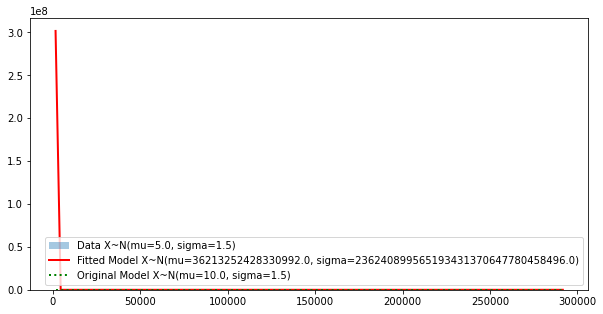

C:\Users\admin\AppData\Local\Temp\ipykernel_23788\4022873605.py:20: RuntimeWarning: overflow encountered in exp
  x_exp = np.exp(x)


RuntimeError: The data contains non-finite values.

In [73]:
# Fit normal
fitting_params = scipy.stats.lognorm.fit(x)
norm_dist_fitted = scipy.stats.lognorm(*fitting_params)
t = np.linspace(np.min(x), np.max(x), 100)

# Plot normals
f, ax = plt.subplots(1, sharex='col', figsize=(10, 5))
sns.distplot(x, ax=ax, norm_hist=True, kde=False, label='Data X~N(mu={0:.1f}, sigma={1:.1f})'.format(mu, sigma))
ax.plot(t, norm_dist_fitted.pdf(t), lw=2, color='r',
        label='Fitted Model X~N(mu={0:.1f}, sigma={1:.1f})'.format(norm_dist_fitted.mean(), norm_dist_fitted.std()))
ax.plot(t, norm_dist.pdf(t), lw=2, color='g', ls=':',
        label='Original Model X~N(mu={0:.1f}, sigma={1:.1f})'.format(norm_dist.mean(), norm_dist.std()))
ax.legend(loc='lower right')
plt.show()


# The lognormal model fits to a variable whose log is normal
# We create our variable whose log is normal 'exponenciating' the previous variable

x_exp = np.exp(x)
mu_exp = np.exp(mu)
sigma_exp = np.exp(sigma)

fitting_params_lognormal = scipy.stats.lognorm.fit(x_exp, floc=0, scale=mu_exp)
lognorm_dist_fitted = scipy.stats.lognorm(*fitting_params_lognormal)
t = np.linspace(np.min(x_exp), np.max(x_exp), 100)

# Here is the magic I was l

In [16]:
norm_dist_fitted

TypeError: _parse_args() missing 1 required positional argument: 's'

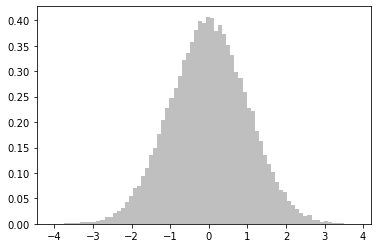

In [28]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm 
from scipy.optimize import curve_fit

x = np.random.normal(size=50000)
fig, ax = plt.subplots() 
nbins = 75
n, bins, patches = ax.hist(x,nbins, density=True, facecolor = 'grey', alpha = 0.5, label='before'); 

centers = (0.5*(bins[1:]+bins[:-1]))
pars, cov = curve_fit(lambda x, mu, sig : norm.pdf(x, loc=mu, scale=sig), centers, n, p0=[0,1])

ax.plot(centers, norm.pdf(centers,*pars), 'k--',linewidth = 2, label='fit before') 
ax.set_title('$\mu={:.4f}\pm{:.4f}$, $\sigma={:.4f}\pm{:.4f}$'.format(pars[0],np.sqrt(cov[0,0]), pars[1], np.sqrt(cov[1,1 ])))

plt.show()         

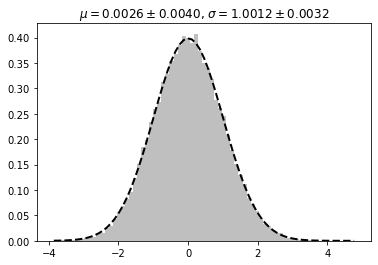

In [84]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm 
from scipy.stats import lognorm 
from scipy.optimize import curve_fit
from scipy import stats

x = np.random.normal(size=50000)
fig, ax = plt.subplots() 
nbins = 75
n, bins, patches = ax.hist(x,nbins, density=True, facecolor = 'grey', alpha = 0.5, label='before'); 

centers = (0.5*(bins[1:]+bins[:-1]))
pars, cov = curve_fit(lambda x, mu, sig : norm.pdf(x, loc=mu, scale=sig), centers, n, p0=[0,1])

ax.plot(centers, norm.pdf(centers,*pars), 'k--',linewidth = 2, label='fit before') 
ax.set_title('$\mu={:.4f}\pm{:.4f}$, $\sigma={:.4f}\pm{:.4f}$'.format(pars[0],np.sqrt(cov[0,0]), pars[1], np.sqrt(cov[1,1 ])))

plt.show()         

# b-values:  500


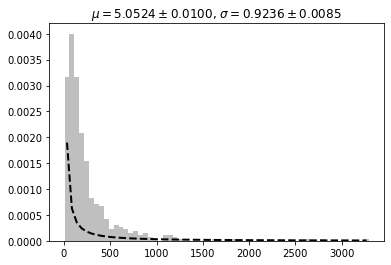

In [86]:
def f(x, mu, sigma) :
   return (1/(np.sqrt(2*np.pi)*sigma*x))*np.exp(-((np.log(x)- mu)**2)/(2*sigma**2))

x = np.random.lognormal(mean = 5, size=500)
fig, ax = plt.subplots() 

b_size = x.size
# percent_thres = 0.03 # take away 5%, 2 standard deiviatons
# cutoff = round(b_size*(percent_thres/2))
# b_list = np.sort(b_list)[:b_size-cutoff]
print('# b-values: ', x.size)
b_iqr = stats.iqr(x, axis=None, rng=(25, 75), scale=1.0, nan_policy='propagate', interpolation='linear', keepdims=False)
b_binsize = (2*b_iqr)/(b_size**(1/3))
nbins = round((np.max(x) - np.min(x))/b_binsize)

n, bins, patches = ax.hist(x,nbins, density=True, facecolor = 'grey', alpha = 0.5, label='before'); 

centers = (0.5*(bins[1:]+bins[:-1]))
pars, cov = curve_fit(f, centers, n, p0=[0,1])

ax.plot(centers, lognorm.pdf(centers,*pars), 'k--',linewidth = 2, label='fit before') 
ax.set_title('$\mu={:.4f}\pm{:.4f}$, $\sigma={:.4f}\pm{:.4f}$'.format(pars[0],np.sqrt(cov[0,0]), pars[1], np.sqrt(cov[1,1 ])))

plt.show()     

In [87]:
pars

array([5.0524343 , 0.92362755])

C:\Users\admin\AppData\Local\Temp\ipykernel_23788\2702017010.py:5: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(np.sqrt(2*np.pi)*sigma*x)*np.exp(-((np.log(x)-
C:\Users\admin\AppData\Local\Temp\ipykernel_23788\2702017010.py:5: RuntimeWarning: divide by zero encountered in log
  return 1/(np.sqrt(2*np.pi)*sigma*x)*np.exp(-((np.log(x)-
C:\Users\admin\AppData\Local\Temp\ipykernel_23788\2702017010.py:5: RuntimeWarning: invalid value encountered in multiply
  return 1/(np.sqrt(2*np.pi)*sigma*x)*np.exp(-((np.log(x)-
C:\Users\admin\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\admin\AppData\Local\Temp\ipykernel_23788\2702017010.py:5: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(np.sqrt(2*np.pi)*sigma*x)*np.exp(-((np.log(x)-
C:\Users\admin\AppData\Local\Temp\ipykernel_23788\27020170

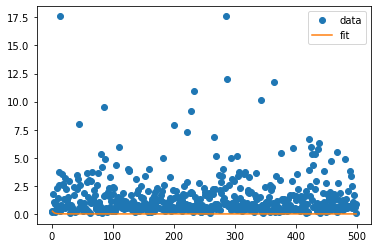

In [67]:
import numpy as np
from scipy.optimize import *

def f(x, mu, sigma) :
   return 1/(np.sqrt(2*np.pi)*sigma*x)*np.exp(-((np.log(x)- 
   mu)**2)/(2*sigma**2))

y0 = np.random.lognormal(mean = 0, size=500)
x0 = np.arange(500)

params, extras = curve_fit(f, xdata = x0, ydata = y0)
plt.figure()
plt.plot(x0, y0, "o")
plt.plot(x0, f(x0 ,params[0], params[1])) 
plt.legend(["data", "fit"], loc="best")
plt.show()
# x / np.linalg.norm(x)

C:\Users\admin\AppData\Local\Temp\ipykernel_23788\2702017010.py:5: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(np.sqrt(2*np.pi)*sigma*x)*np.exp(-((np.log(x)-
C:\Users\admin\AppData\Local\Temp\ipykernel_23788\2702017010.py:5: RuntimeWarning: divide by zero encountered in log
  return 1/(np.sqrt(2*np.pi)*sigma*x)*np.exp(-((np.log(x)-
C:\Users\admin\AppData\Local\Temp\ipykernel_23788\2702017010.py:5: RuntimeWarning: invalid value encountered in multiply
  return 1/(np.sqrt(2*np.pi)*sigma*x)*np.exp(-((np.log(x)-
C:\Users\admin\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


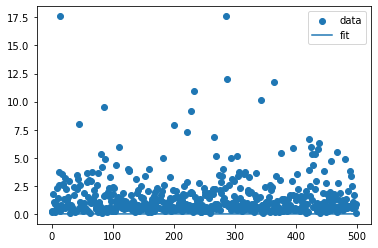

In [68]:

params, extras = curve_fit(f, x0, y0)

plt.scatter(x0, y0)
plt.plot(x0, f(x0 ,params[0], params[1])) 
plt.legend(["data", "fit"], loc="best")
plt.show()

In [56]:
x0

array([ 5.07760548,  0.84409321,  0.65959399,  3.78617619,  0.4892837 ,
        1.09383074,  2.11835766,  1.02859057,  1.18923609,  0.28688318,
        1.61796805,  0.31087464,  0.84715398, 24.16911202,  3.98252696,
        0.89491628,  0.67197021,  1.71936982,  5.58088635,  0.68209139,
        0.63403188,  4.97416646,  2.32520001,  2.22966209, 10.42817373,
        0.7378705 ,  1.05183284,  1.39908831,  0.95450285,  2.95578931,
        5.98477914,  0.99945299,  4.00113681,  0.41941319,  0.79474253,
        0.75223652,  0.11960778,  1.96803332,  3.09810519,  0.48567429,
        0.17800282,  5.61875694,  1.77139463,  4.64466741,  0.10122699,
        0.6438217 ,  7.2208175 ,  1.50099814,  0.03398614,  0.2721147 ,
        0.87253971,  0.84870282,  3.50254042,  0.83129846,  0.36994381,
        0.38879256,  1.0295893 ,  0.43698921,  1.10799945,  1.2462114 ,
        1.3028101 ,  0.5755887 ,  0.18291657,  0.33349126,  0.38284127,
        0.68060745,  1.09301411,  0.1198552 ,  3.19401425,  3.47

# Solution to Lognormal Fitting

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


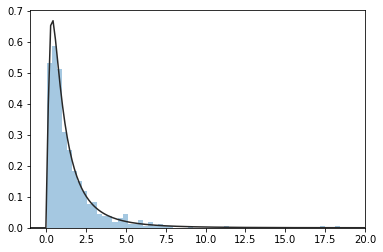

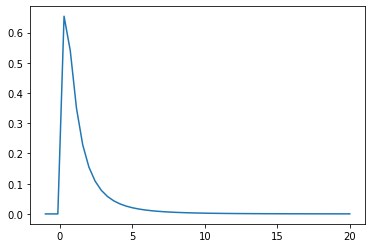

In [109]:
x = np.random.lognormal(size=500)

b_iqr = stats.iqr(x, axis=None, rng=(25, 75), scale=1.0, nan_policy='propagate', interpolation='linear', keepdims=False)
b_binsize = (2*b_iqr)/(b_size**(1/3))
b_numBins = round((np.max(x) - np.min(x))/b_binsize)

ax = sns.distplot(x, kde=False, hist=True, 
                  norm_hist=True, fit=lognorm, bins=b_numBins+ 10)
ax.set_xlim(-1, 20)
params = lognorm.fit(x)
xvals = np.linspace(-1, 20)
pdf = lambda x: lognorm.pdf(xvals, *params)

# Plotting the linear line
yvals = pdf(xvals)
plt.figure()
plt.plot(xvals, yvals)

In [100]:
pdf

<function __main__.<lambda>(x)>

In [101]:
params

(1.0056211068093122, -0.002538606343801007, 0.9918563195892498)

In [167]:
x = np.random.lognormal(size=500)

The MSE for this sample is :  0.0005058047062610103


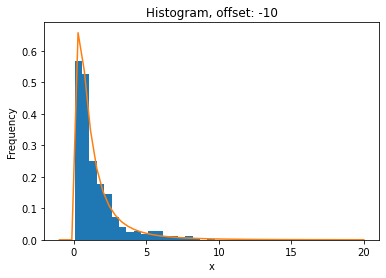

The MSE for this sample is :  0.0005241977700421421


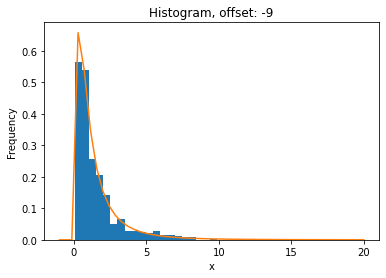

The MSE for this sample is :  0.0004327742491641269


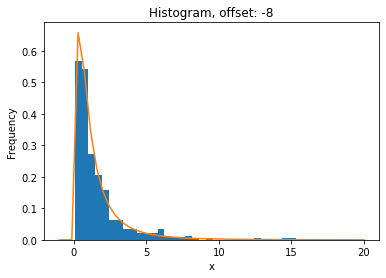

The MSE for this sample is :  0.00047120084140203714


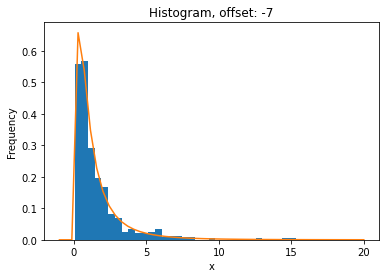

The MSE for this sample is :  0.0004507075923598504


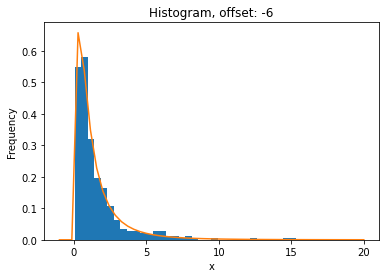

The MSE for this sample is :  0.0005406633776916012


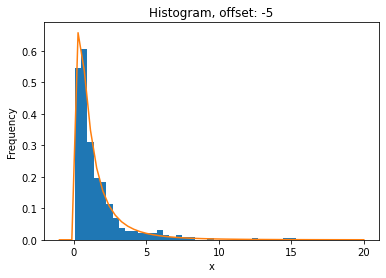

The MSE for this sample is :  0.0006312590474686308


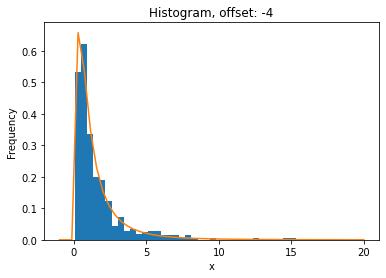

The MSE for this sample is :  0.0004534262718220701


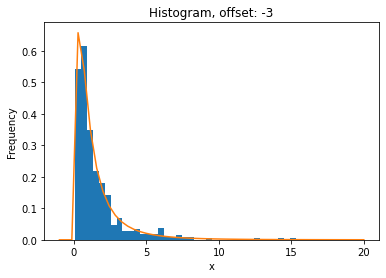

The MSE for this sample is :  0.00041247442032699117


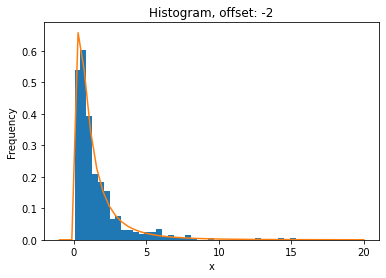

The MSE for this sample is :  0.00044077841552966554


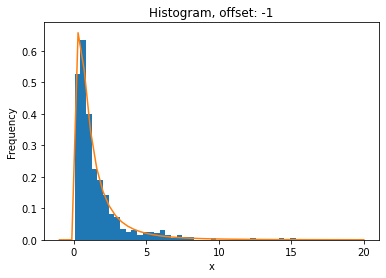

The MSE for this sample is :  0.00046217776806992995


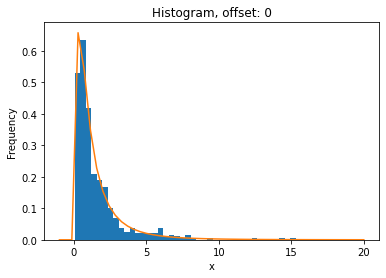

The MSE for this sample is :  0.0006032540755760095


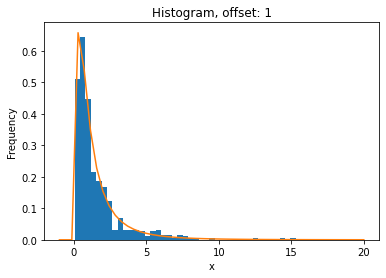

The MSE for this sample is :  0.0005550604333509064


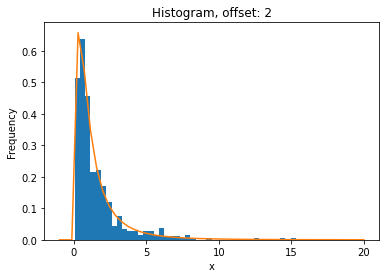

The MSE for this sample is :  0.0004229659498293987


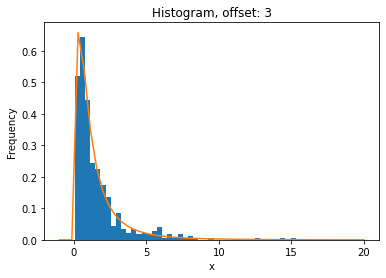

The MSE for this sample is :  0.00038273878118122044


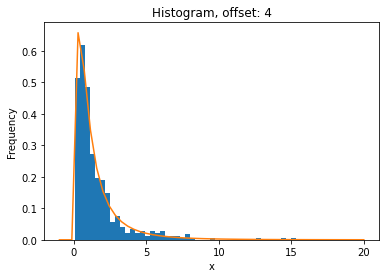

The MSE for this sample is :  0.00042660517093268385


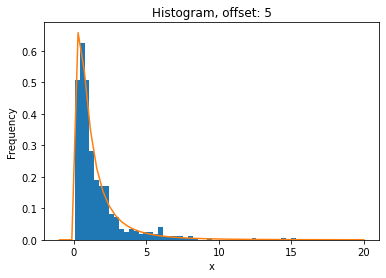

The MSE for this sample is :  0.0003061444349478847


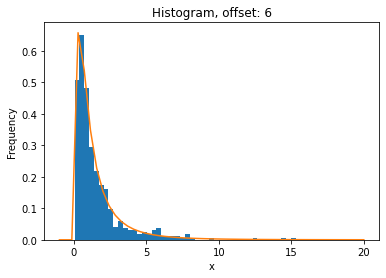

The MSE for this sample is :  0.00034650308422396587


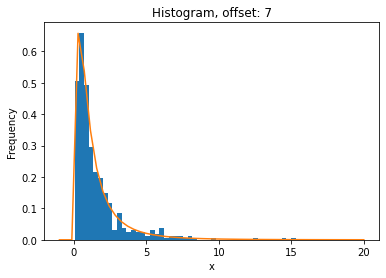

The MSE for this sample is :  0.00031059257368532824


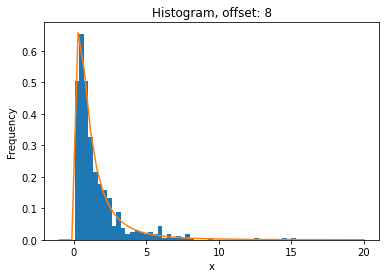

The MSE for this sample is :  0.00031551060191062477


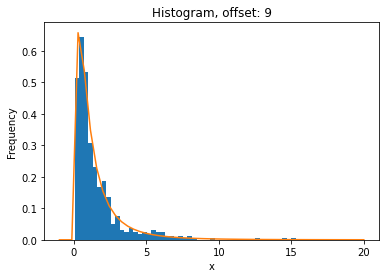

The MSE for this sample is :  0.0003322730764834241


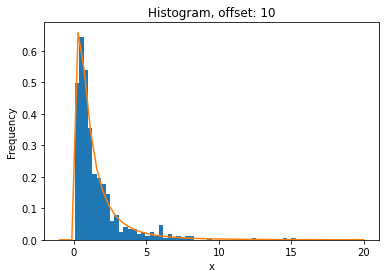

The minimum MSE for this sample is :  0.0003061444349478847 , offset:  6


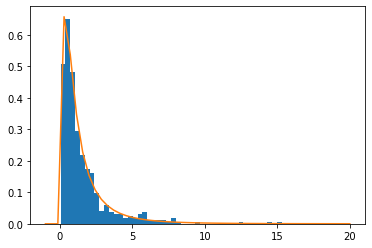

In [168]:
b_iqr = stats.iqr(x, axis=None, rng=(25, 75), scale=1.0, nan_policy='propagate', interpolation='linear', keepdims=False)
b_binsize = (2*b_iqr)/(b_size**(1/3))
initial_num_bins = round((np.max(x) - np.min(x))/b_binsize)

def mean_squared(n_normed, actual):
    actual_ = np.where(np.array(n_normed) == 0, 0, actual)
    return ((n_normed - actual_)**2).mean()

search_range = 3
arr = np.arange(-search_range, search_range + 1)

# Iterate over the search range to find the best fitting num_bins
err = np.array([])
dictionary = {}
for i in arr:
    plt.figure()
    n, bins, _ = plt.hist(x, bins = b_numBins + i, density = True)
    plt.title('Histogram, offset: '+ str(i))
    plt.xlabel('x')
    plt.ylabel('Frequency')

    centers_x = (0.5*(bins[1:]+bins[:-1]))
    params = lognorm.fit(x)
    xvals_calc = np.linspace(centers_x[0], centers_x[-1], centers_x.size)
    xvals_vis = np.linspace(-1, 20)
    pdf_calc = lambda x: lognorm.pdf(xvals_calc, *params)
    pdf_vis = lambda x: lognorm.pdf(xvals_vis, *params)

    # Calculating the mse from the values
    actual = pdf_calc(xvals_calc)
    mse = mean_squared(n, actual)
    err = np.append(err, mse)
    dictionary[mse] = i
    print('The MSE for this sample is : ', mse)
    
#     Plotting the linear line
    yvals_vis = pdf_vis(xvals_vis)
    plt.plot(xvals_vis, yvals_vis)
    plt.show() 

mse_min = min(err)
print('The minimum MSE for this sample is : ', mse_min, ', offset: ', dictionary[mse_min])

plt.hist(x, bins = b_numBins + dictionary[mse_min], density = True)
params = lognorm.fit(x)
xvals_vis = np.linspace(-1, 20)
pdf_vis = lambda x: lognorm.pdf(xvals_vis, *params)
yvals_vis = pdf_vis(xvals_vis)
plt.plot(xvals_vis, yvals_vis)
plt.show() 

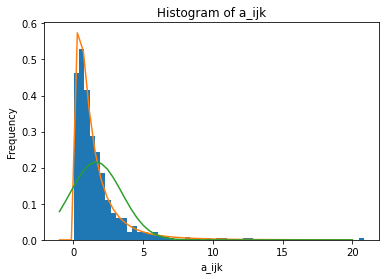

In [174]:
## Testing for matplotlib histogram instead of using seaborn

def mean_squared(n_normed, actual):
    return ((n_normed - actual)**2).mean()

x = np.random.lognormal(mean = 0, size=600)

b_iqr = stats.iqr(x, axis=None, rng=(25, 75), scale=1.0, nan_policy='propagate', interpolation='linear', keepdims=False)
b_binsize = (2*b_iqr)/(b_size**(1/3))
b_numBins = round((np.max(x) - np.min(x))/b_binsize)

n, bins, _ = plt.hist(x, bins = b_numBins, density = True)
plt.title('Histogram of a_ijk')
plt.xlabel('a_ijk')
plt.ylabel('Frequency')

centers_x = (0.5*(bins[1:]+bins[:-1]))
params = lognorm.fit(x)
params_norm = norm.fit(x)
xvals_calc = np.linspace(centers_x[0], centers_x[-1], centers_x.size)
xvals_vis = np.linspace(-1, 20)
pdf_calc = lambda x: lognorm.pdf(xvals_calc, *params)
pdf_vis = lambda x: lognorm.pdf(xvals_vis, *params)
pdf_norm_vis = lambda x: norm.pdf(xvals_vis, *params_norm)

# Plotting the linear lineb
yvals = pdf_vis(xvals_vis)
yvals_norm = pdf_norm_vis(xvals_vis)
plt.plot(xvals_vis, yvals)
plt.plot(xvals_vis, yvals_norm)
plt.show() 

In [154]:
actual = pdf_calc(xvals_calc)
mean_squared(n, actual)

0.0004362335717618059

In [172]:
centers_x = (0.5*(bins[1:]+bins[:-1]))
centers_y = pdf(centers_x)
def mean_squared(n_normed, actual):
    actual_ = np.where(np.array(n_normed) == 0, 0, actual)
    return ((n_normed - actual_)**2)
bins, centers_x, n, centers_y, mean_squared(n, actual)

(array([ 0.05295457,  0.35803896,  0.66312335,  0.96820775,  1.27329214,
         1.57837653,  1.88346092,  2.18854531,  2.4936297 ,  2.79871409,
         3.10379849,  3.40888288,  3.71396727,  4.01905166,  4.32413605,
         4.62922044,  4.93430483,  5.23938922,  5.54447362,  5.84955801,
         6.1546424 ,  6.45972679,  6.76481118,  7.06989557,  7.37497996,
         7.68006436,  7.98514875,  8.29023314,  8.59531753,  8.90040192,
         9.20548631,  9.5105707 ,  9.8156551 , 10.12073949, 10.42582388,
        10.73090827, 11.03599266, 11.34107705, 11.64616144, 11.95124583,
        12.25633023, 12.56141462, 12.86649901, 13.1715834 , 13.47666779,
        13.78175218, 14.08683657, 14.39192097, 14.69700536, 15.00208975,
        15.30717414]),
 array([ 0.20549677,  0.51058116,  0.81566555,  1.12074994,  1.42583433,
         1.73091872,  2.03600312,  2.34108751,  2.6461719 ,  2.95125629,
         3.25634068,  3.56142507,  3.86650946,  4.17159386,  4.47667825,
         4.78176264,  5.0868

In [ ]:
# Apply the pdf onto centers to get the fitting range
mse = ((n_normed - centers_y)**2).mean(axis=ax)
print("MSE of this fit: ", mse)

In [ ]:
b_iqr = stats.iqr(x, axis=None, rng=(25, 75), scale=1.0, nan_policy='propagate', interpolation='linear', keepdims=False)
b_binsize = (2*b_iqr)/(b_size**(1/3))
initial_num_bins = round((np.max(x) - np.min(x))/b_binsize)

def mean_squared(n_normed, actual):
    actual_ = np.where(np.array(n_normed) == 0, 0, actual)
    return ((n_normed - actual_)**2).mean()

search_range = 3
arr = np.arange(-search_range, search_range + 1)

# Iterate over the search range to find the best fitting num_bins
err = np.array([])
dictionary = {}
for i in arr:
    plt.figure()
    n, bins, _ = plt.hist(x, bins = b_numBins + i, density = True)
    plt.title('Histogram, offset: '+ str(i))
    plt.xlabel('x')
    plt.ylabel('Frequency')

    centers_x = (0.5*(bins[1:]+bins[:-1]))
    params = lognorm.fit(x)
    xvals_calc = np.linspace(centers_x[0], centers_x[-1], centers_x.size)
    xvals_vis = np.linspace(-1, 20)
    pdf_calc = lambda x: lognorm.pdf(xvals_calc, *params)
    pdf_vis = lambda x: lognorm.pdf(xvals_vis, *params)

    # Calculating the mse from the values
    actual = pdf_calc(xvals_calc)
    mse = mean_squared(n, actual)
    err = np.append(err, mse)
    dictionary[mse] = i
    print('The MSE for this sample is : ', mse)
    
#     Plotting the linear line
    yvals_vis = pdf_vis(xvals_vis)
    plt.plot(xvals_vis, yvals_vis)
    plt.show() 

mse_min = min(err)
print('The minimum MSE for this sample is : ', mse_min, ', offset: ', dictionary[mse_min])

plt.hist(x, bins = b_numBins + dictionary[mse_min], density = True)
params = lognorm.fit(x)
xvals_vis = np.linspace(-1, 20)
pdf_vis = lambda x: lognorm.pdf(xvals_vis, *params)
yvals_vis = pdf_vis(xvals_vis)
plt.plot(xvals_vis, yvals_vis)
plt.show() 